In [2]:
# Import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 
from sklearn.linear_model import LinearRegression, LogisticRegression 
import statsmodels.api as sm

In [3]:
# Load the dataset 
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Display basic dataset information 
print(df.shape)  # (768, 9) 
print(df.head())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Descriptive statistics 
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# Univariate analysis 
for column in df.columns:     
    print(f"Column: {column}")
    print(f"Frequency:\n{df[column].value_counts()}\n")
    print(f"Mean: {df[column].mean()}")     
    print(f"Median: {df[column].median()}")     
    print(f"Mode:\n{df[column].mode()}")     
    print(f"Variance: {df[column].var()}")     
    print(f"Standard Deviation: {df[column].std()}")     
    print(f"Skewness: {df[column].skew()}")     
    print(f"Kurtosis: {df[column].kurt()}")     
    print("\n")


Column: Pregnancies
Frequency:
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

Mean: 3.8450520833333335
Median: 3.0
Mode:
0    1
Name: Pregnancies, dtype: int64
Variance: 11.354056320621465
Standard Deviation: 3.3695780626988694
Skewness: 0.9016739791518588
Kurtosis: 0.15921977754746486


Column: Glucose
Frequency:
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

Mean: 120.89453125
Median: 117.0
Mode:
0     99
1    100
Name: Glucose, dtype: int64
Variance: 1022.2483142519557
Standard Deviation: 31.97261819513622
Skewness: 0.17375350179188992
Kurtosis: 0.6407798203735053


Column: BloodPressure
Frequency:
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62  

In [7]:
from sklearn.linear_model import LinearRegression, LogisticRegression
# Prepare the data for linear regression
X_linear = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']] 
y_linear = df['Outcome']
# Fit the linear regression model 
model_linear = LinearRegression() 
model_linear.fit(X_linear, y_linear)
# Print the coefficients
print('Linear Regression Coefficients:') 
for feature, coef in zip(X_linear.columns, model_linear.coef_):     
    print(f'{feature}: {coef}')
# Make predictions
predictions_linear = model_linear.predict(X_linear)
# Prepare the data for logistic regression
X_logistic = X_linear  # Using the same features as linear regression 
y_logistic = y_linear
# Fit the logistic regression model 
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_logistic, y_logistic)
# Print the logistic regression coefficients 
print('\nLogistic Regression Coefficients:') 
for feature, coef in zip(X_logistic.columns, model_logistic.coef_[0]):     
    print(f'{feature}: {coef}')
# Make predictions with logistic regression
predictions_logistic = model_logistic.predict(X_logistic)


Linear Regression Coefficients:
Glucose: 0.006501237695156432
BloodPressure: -0.001431409631909957
SkinThickness: -0.00040874719299360715
Insulin: -0.00026552573875242844
BMI: 0.013107614185757177
DiabetesPedigreeFunction: 0.14438535674100822



Logistic Regression Coefficients:
Glucose: 0.037629789812627566
BloodPressure: -0.007247089196453487
SkinThickness: -0.0019919013361769373
Insulin: -0.001702224179802232
BMI: 0.08258463227026877
DiabetesPedigreeFunction: 0.855042793287322


In [8]:
from sklearn.linear_model import LogisticRegression
# Prepare the data for logistic regression
X_logistic = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']] 
y_logistic = df['Outcome']
# Fit the logistic regression model 
model_logistic = LogisticRegression(max_iter=1000) 
model_logistic.fit(X_logistic, y_logistic)
# Print the logistic regression coefficients 
print('\nLogistic Regression Coefficients:') 
for feature, coef in zip(X_logistic.columns, model_logistic.coef_[0]):     
    print(f'{feature}: {coef}')
# Make predictions
predictions_logistic = model_logistic.predict(X_logistic)



Logistic Regression Coefficients:
Glucose: 0.037629789812627566
BloodPressure: -0.007247089196453487
SkinThickness: -0.0019919013361769373
Insulin: -0.001702224179802232
BMI: 0.08258463227026877
DiabetesPedigreeFunction: 0.855042793287322


In [9]:
# Make predictions 
predictions_logistic = model_logistic.predict(X_logistic)
# Multiple Regression Analysis using OLS
# Independent and dependent variables 
X = df.drop('Outcome', axis=1) 
y = df['Outcome']
# Add a constant to the independent variables
X = sm.add_constant(X) # Fit the model 
model = sm.OLS(y, X) 
results = model.fit() # Print the regression summary 
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           7.36e-55
Time:                        22:18:32   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

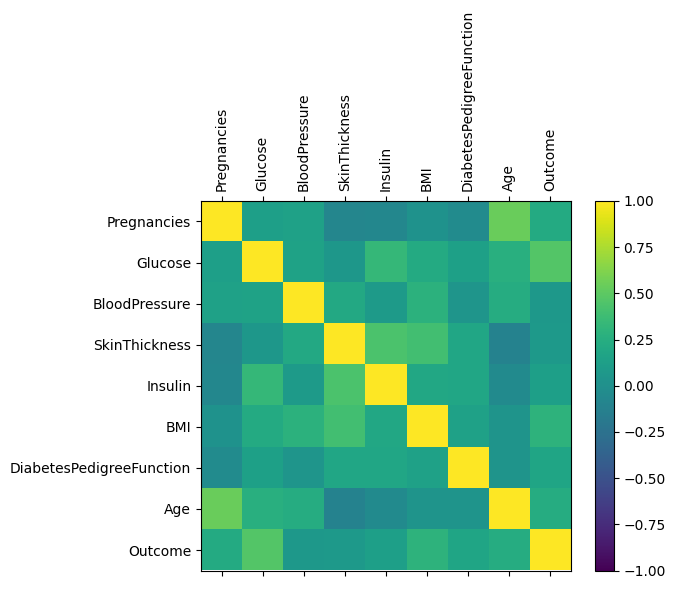

In [10]:
# Correlation matrix visualization 
corr = df.corr() 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0, 9, 1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
names = df.columns
ax.set_xticklabels(names, rotation=90) 
ax.set_yticklabels(names) 
plt.show()


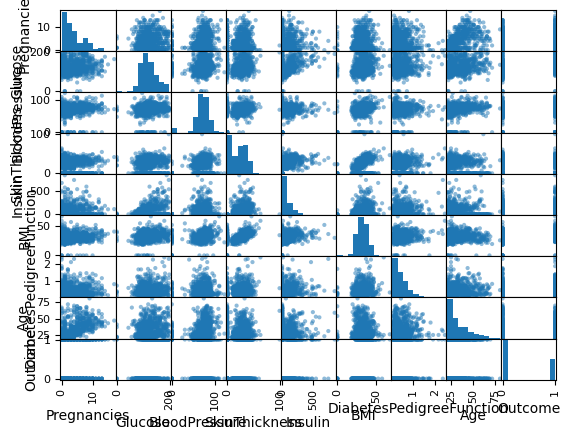

In [11]:
scatter_matrix(df)
plt.show()